In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import(
    month_plot,
    quarter_plot,
    plot_acf,
    plot_pacf
)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error)
from sklearn.model_selection import ParameterGrid


In [22]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

In [23]:
# Function to plot the future
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train and forecast data
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

In [2]:
## Loding the data
df = pd.read_csv("Nifty 50.csv")
df.head()

,Date,Nifty 50_Open,Nifty 50_High,Nifty 50_Low,Nifty 50_Close,Nifty 50_Volume
0,03-07-2006,3128.8,3160.4,3114.9,3151.0,66600000
1,04-07-2006,3151.1,3177.4,3130.3,3138.7,66680000
2,05-07-2006,3137.0,3201.2,3121.8,3197.1,90420000
3,06-07-2006,3197.5,3197.5,3138.4,3156.4,74890000
4,07-07-2006,3158.0,3193.1,3056.3,3075.9,90060000


In [3]:
## Checking for null values
df.isnull().sum()

Date               0
Nifty 50_Open      0
Nifty 50_High      0
Nifty 50_Low       0
Nifty 50_Close     0
Nifty 50_Volume    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4707 non-null   object 
 1   Nifty 50_Open    4707 non-null   float64
 2   Nifty 50_High    4707 non-null   float64
 3   Nifty 50_Low     4707 non-null   float64
 4   Nifty 50_Close   4707 non-null   float64
 5   Nifty 50_Volume  4707 non-null   object 
dtypes: float64(4), object(2)
memory usage: 220.8+ KB


#### Coverting the Date type and Data types

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df.head(3)

## Removing the comas from columns and converting dtype to numeric
df["Nifty 50_Volume"] = df["Nifty 50_Volume"].str.replace(',', '')
df["Nifty 50_Volume"] = pd.to_numeric(df["Nifty 50_Volume"], errors='coerce')



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4707 non-null   datetime64[ns]
 1   Nifty 50_Open    4707 non-null   float64       
 2   Nifty 50_High    4707 non-null   float64       
 3   Nifty 50_Low     4707 non-null   float64       
 4   Nifty 50_Close   4707 non-null   float64       
 5   Nifty 50_Volume  4690 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 220.8 KB


### EDA

In [7]:
print(df.describe())

                                Date  Nifty 50_Open  Nifty 50_High  \
count                           4707    4707.000000    4707.000000   
mean   2015-12-30 05:55:47.609942528   10058.352050   10113.500255   
min              2006-07-03 00:00:00    2526.200000    2585.300000   
25%              2011-03-30 12:00:00    5356.450000    5395.150000   
50%              2015-12-30 00:00:00    8272.800000    8322.200000   
75%              2020-09-30 12:00:00   12163.650000   12221.900000   
max              2025-06-30 00:00:00   26248.300000   26277.400000   
std                              NaN    5949.064337    5967.148961   

       Nifty 50_Low  Nifty 50_Close  Nifty 50_Volume  
count   4707.000000     4707.000000     4.690000e+03  
mean    9989.095836    10052.887933     2.491820e+08  
min     2252.800000     2524.200000     0.000000e+00  
25%     5310.150000     5355.900000     1.452425e+08  
50%     8220.500000     8270.500000     2.056800e+08  
75%    12105.400000    12158.100000    

In [29]:
import seaborn as sns

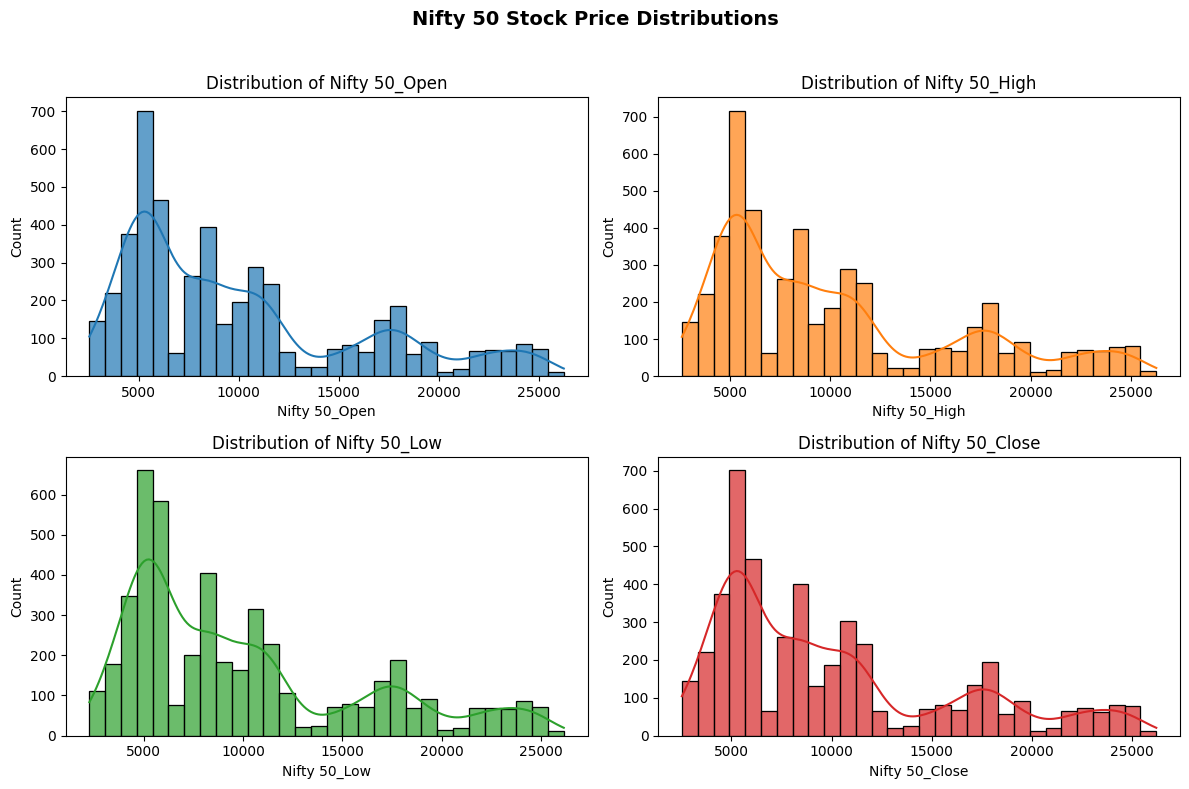

In [8]:
## plotting the distribution of stock prices
plt.figure(figsize=(12, 8))

# Subplot 1
plt.subplot(2, 2, 1)
sns.histplot(df['Nifty 50_Open'], kde=True, bins=30,
             color="#1f77b4", edgecolor="black", alpha=0.7)
plt.title("Distribution of Nifty 50_Open")

# Subplot 2
plt.subplot(2, 2, 2)
sns.histplot(df['Nifty 50_High'], kde=True, bins=30,
             color="#ff7f0e", edgecolor="black", alpha=0.7)
plt.title("Distribution of Nifty 50_High")

# Subplot 3
plt.subplot(2, 2, 3)
sns.histplot(df['Nifty 50_Low'], kde=True, bins=30,
             color="#2ca02c", edgecolor="black", alpha=0.7)
plt.title("Distribution of Nifty 50_Low")

# Subplot 4
plt.subplot(2, 2, 4)
sns.histplot(df['Nifty 50_Close'], kde=True, bins=30,
             color="#d62728", edgecolor="black", alpha=0.7)
plt.title("Distribution of Nifty 50_Close")

plt.suptitle("Nifty 50 Stock Price Distributions", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [9]:
df.isnull().sum()

Date                0
Nifty 50_Open       0
Nifty 50_High       0
Nifty 50_Low        0
Nifty 50_Close      0
Nifty 50_Volume    17
dtype: int64

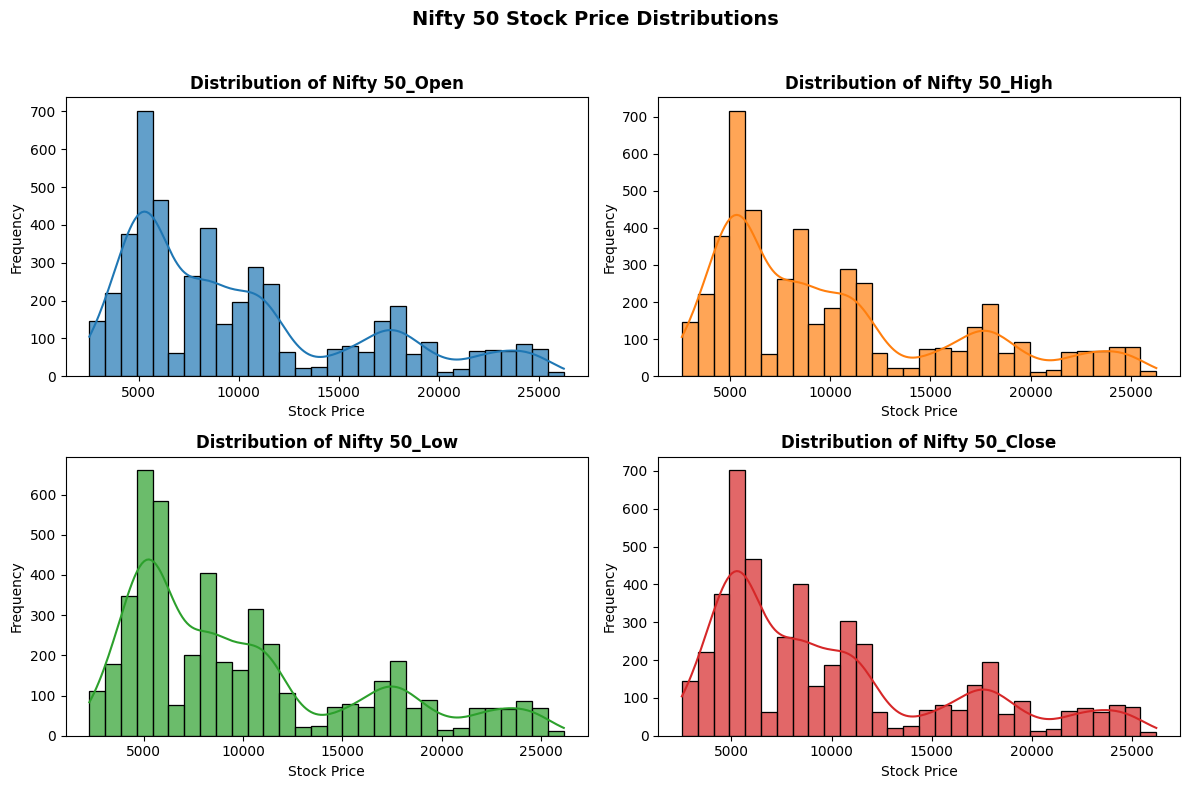

In [10]:
def plot_stock_distributions(df, cols, bins=30):
    plt.figure(figsize=(12, 8))
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # custom colors

    for i, col in enumerate(cols):
        plt.subplot(2, 2, i+1)
        sns.histplot(
            df[col],
            kde=True,
            bins=bins,
            color=colors[i],
            edgecolor="black",
            alpha=0.7
        )
        plt.title(f'Distribution of {col}', fontsize=12, weight="bold")
        plt.xlabel("Stock Price", fontsize=10)
        plt.ylabel("Frequency", fontsize=10)

    plt.suptitle("Nifty 50 Stock Price Distributions", fontsize=14, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_stock_distributions(df, 
                         ['Nifty 50_Open', 'Nifty 50_High', 'Nifty 50_Low', 'Nifty 50_Close']
                         )

In [11]:
# Set Date as INDEX 
df.set_index("Date", inplace=True)
df.head()

,Nifty 50_Open,Nifty 50_High,Nifty 50_Low,Nifty 50_Close,Nifty 50_Volume
Date,,,,,
2006-07-03,3128.8,3160.4,3114.9,3151.0,66600000.0
2006-07-04,3151.1,3177.4,3130.3,3138.7,66680000.0
2006-07-05,3137.0,3201.2,3121.8,3197.1,90420000.0
2006-07-06,3197.5,3197.5,3138.4,3156.4,74890000.0
2006-07-07,3158.0,3193.1,3056.3,3075.9,90060000.0


In [12]:
df.loc['2024']

,Nifty 50_Open,Nifty 50_High,Nifty 50_Low,Nifty 50_Close,Nifty 50_Volume
Date,,,,,
2024-01-01,21727.8,21834.4,21680.9,21741.9,154000000.0
2024-01-02,21751.4,21755.6,21555.7,21665.8,263710000.0
2024-01-03,21661.1,21677.0,21500.4,21517.4,311930000.0
2024-01-04,21605.8,21685.7,21564.6,21658.6,339170000.0
2024-01-05,21705.8,21749.6,21629.2,21710.8,309300000.0
...,...,...,...,...,...
2024-12-24,23769.1,23867.7,23685.2,23727.7,177660000.0
2024-12-26,23775.8,23854.5,23653.6,23750.2,177680000.0
2024-12-27,23801.4,23938.9,23800.6,23813.4,176820000.0


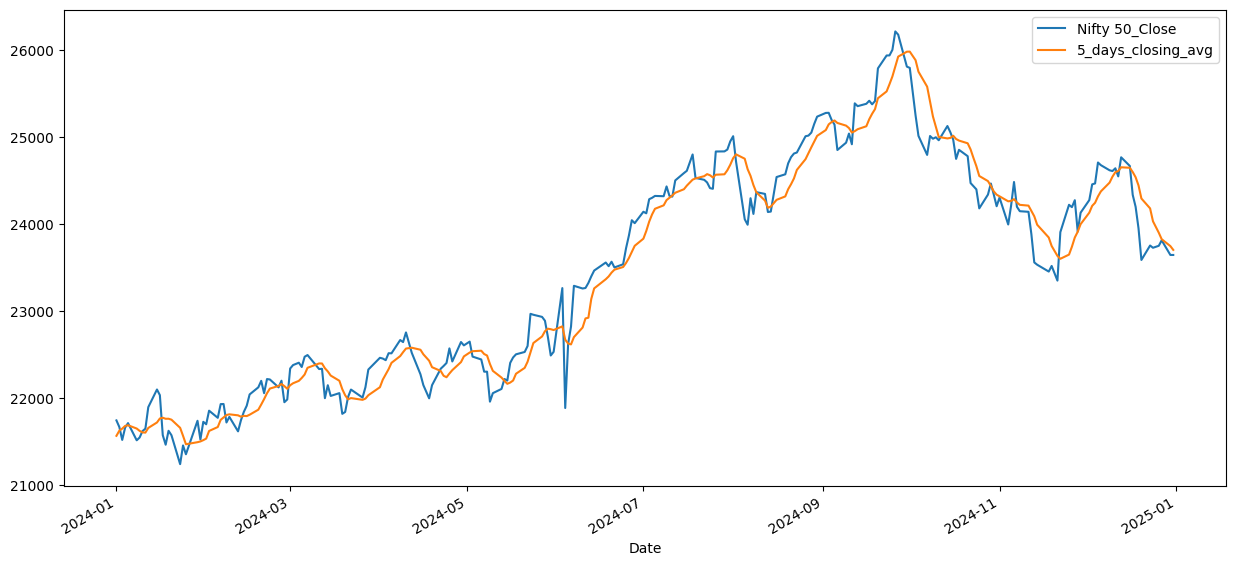

In [13]:
## Genrating 5 days rolling average of Closing date
df["5_days_closing_avg"] = df['Nifty 50_Close'].rolling(window=7).mean()

# Ploting both the daily 'Close' price and the 5-day rolling average for the year 2023.
# This visual comparison shows how smoothing reduces day-to-day noise.
df[["Nifty 50_Close", "5_days_closing_avg"]].loc["2024"].plot(figsize=(15, 7))
plt.show()

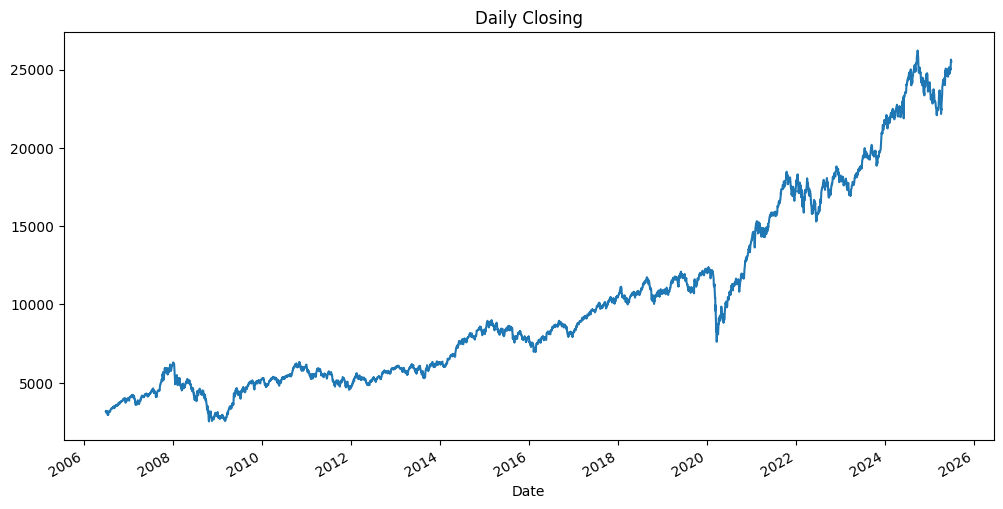

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
df['Nifty 50_Close'].plot(title="Daily Closing")

plt.show()

In [15]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

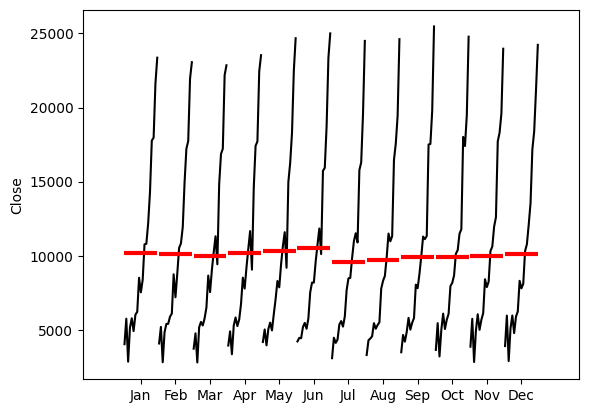

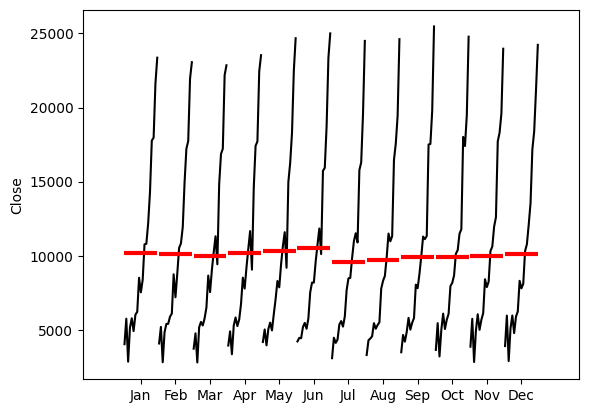

In [16]:
## Monthly seasonality
month_plot(df['Nifty 50_Close'].resample('ME').mean(),
           ylabel='Close')

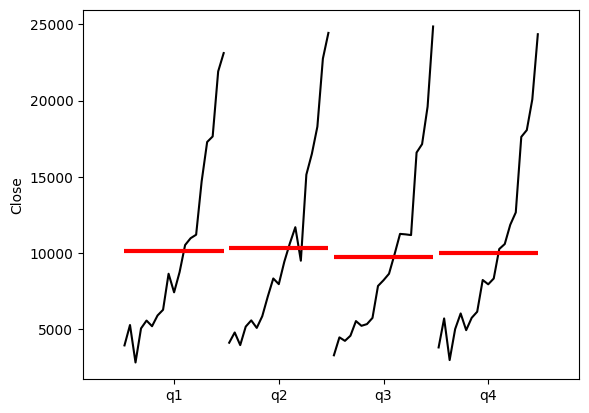

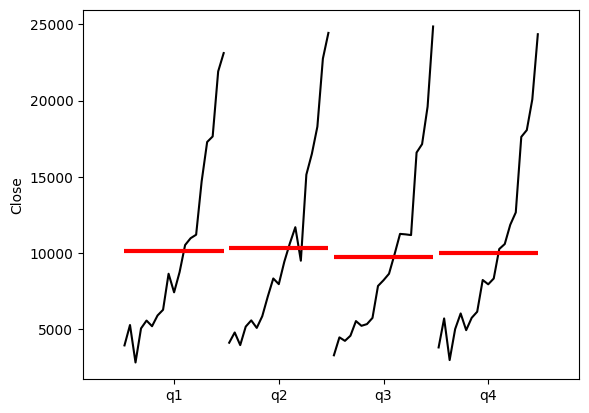

In [17]:
quarter_plot(df['Nifty 50_Close'].resample('QE').mean(), ylabel='Close')

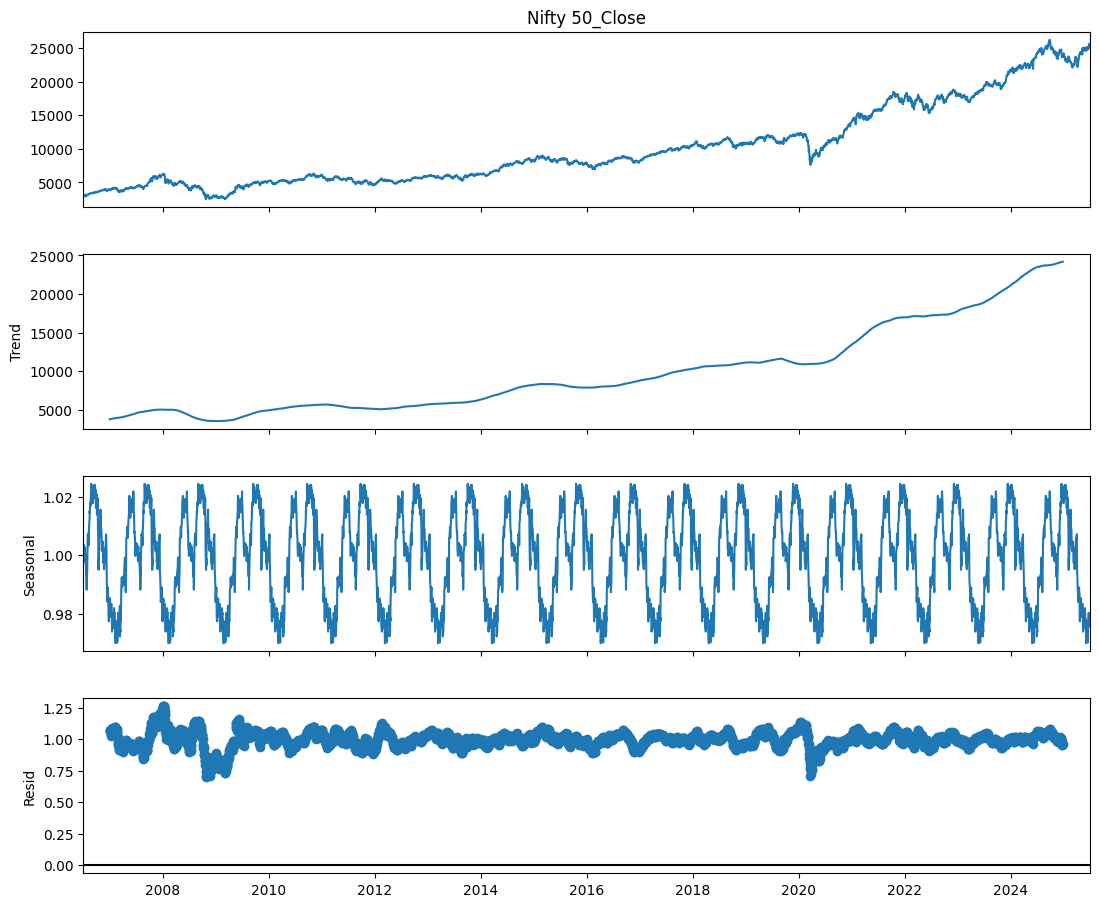

In [18]:
decomposition = seasonal_decompose(df['Nifty 50_Close'],
                                   model = 'mul',
                                   period = 252)

fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [19]:
# Change the time series variable name
df = df.rename(columns= {'Nifty 50_Close' :'y'})
df.head()

,Nifty 50_Open,Nifty 50_High,Nifty 50_Low,y,Nifty 50_Volume,5_days_closing_avg
Date,,,,,,
2006-07-03,3128.8,3160.4,3114.9,3151.0,66600000.0,NaN
2006-07-04,3151.1,3177.4,3130.3,3138.7,66680000.0,NaN
2006-07-05,3137.0,3201.2,3121.8,3197.1,90420000.0,NaN
2006-07-06,3197.5,3197.5,3138.4,3156.4,74890000.0,NaN
2006-07-07,3158.0,3193.1,3056.3,3075.9,90060000.0,NaN


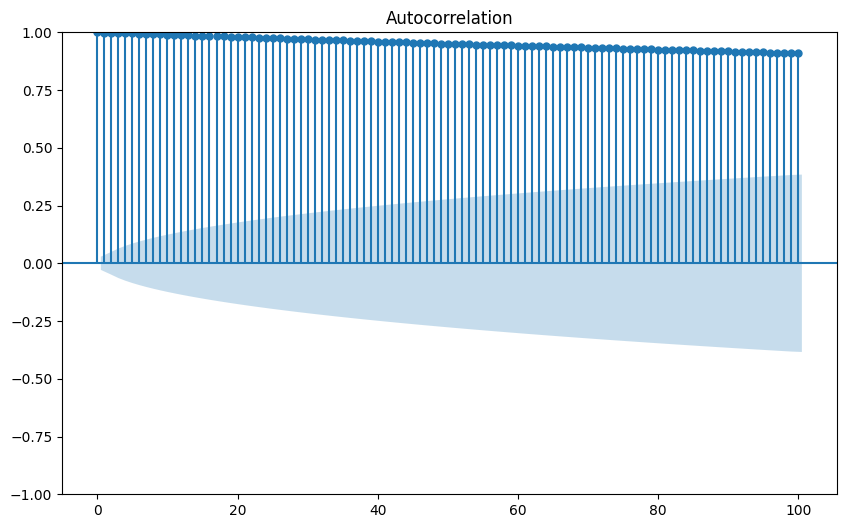

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

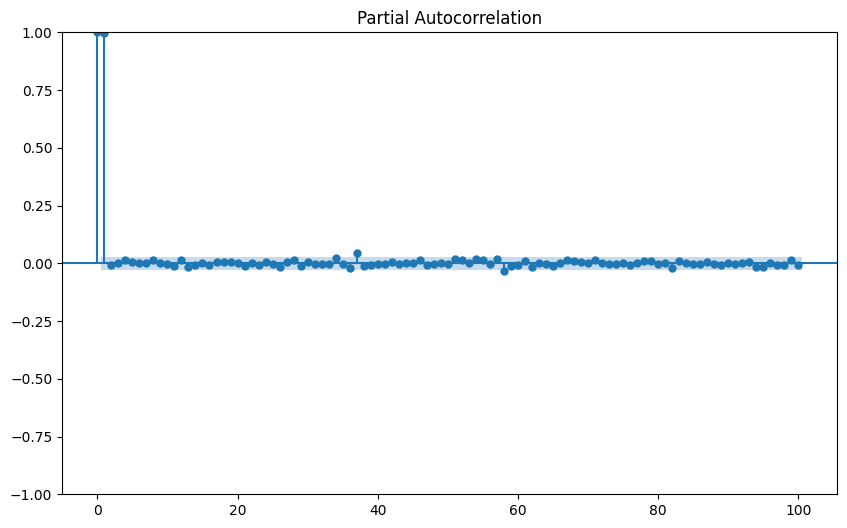

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['y_diff'], lags=100, ax=ax)
plt.show()

## Stationarity

In [25]:
# Performing ADFuller test 
result = adfuller(df['y'])
print(f"P-Value: {result[1]}")
if result[1] > 0.05:
    print("The series is Non-Stationary")
else:
    print("This series is Stationary")

P-Value: 0.9967008504295323
The series is Non-Stationary


In [26]:
## Diffrencing to make series Stationary
df['y_diff'] = df['y'].diff()
df.head()

,Nifty 50_Open,Nifty 50_High,Nifty 50_Low,y,Nifty 50_Volume,5_days_closing_avg,y_diff
Date,,,,,,,
2006-07-03,3128.8,3160.4,3114.9,3151.0,66600000.0,NaN,NaN
2006-07-04,3151.1,3177.4,3130.3,3138.7,66680000.0,NaN,-12.3
2006-07-05,3137.0,3201.2,3121.8,3197.1,90420000.0,NaN,58.4
2006-07-06,3197.5,3197.5,3138.4,3156.4,74890000.0,NaN,-40.7
2006-07-07,3158.0,3193.1,3056.3,3075.9,90060000.0,NaN,-80.5


In [27]:
# Performing ADFuller test Again
result = adfuller(df['y_diff'].dropna())
print(f"P-Value: {result[1]}")
if result[1] > 0.05:
    print("The series is Non-Stationary")
else:
    print("This series is Stationary")

P-Value: 6.0259551999950856e-30
This series is Stationary


## ARIMA

In [28]:
test_days = 30
train = df.iloc[:-test_days]
test = df.iloc[-test_days:]
test.head()

,Nifty 50_Open,Nifty 50_High,Nifty 50_Low,y,Nifty 50_Volume,5_days_closing_avg,y_diff
Date,,,,,,,
2025-05-20,24996.2,25010.4,24669.7,24683.9,414800000.0,24840.185714,-261.6
2025-05-21,24744.3,24946.2,24685.4,24813.5,332720000.0,24824.300000,129.6
2025-05-22,24734.0,24737.5,24462.4,24609.7,403280000.0,24828.771429,-203.8
2025-05-23,24639.5,24909.1,24614.1,24853.2,270470000.0,24855.385714,243.5
2025-05-26,24919.4,25079.2,24900.5,25001.2,302800000.0,24846.685714,148.0


In [ ]:
## Create the ARIMA model
model = SARIMAX(train['y'],
                order = (2,1,1),
                seasonal_order=(0,0,0,0)).fit()
print(model.summary()) #57493.113

s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4677
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -28810.854
Date:                Sun, 31 Aug 2025   AIC                          57629.709
Time:                        22:41:00   BIC                          57655.509
Sample:                             0   HQIC                         57638.782
                               - 4677                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0833      0.471      0.177      0.860      -0.841       1.007
ar.L2          0.0171      0.008      2.284      0.022       0.002       0.032
ma.L1         -0.0831      0.471     -0.176      0.8

In [36]:
## Predict with the ARIMA model
predictions = model.forecast(steps=test_days)
predictions

s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


4677    24945.327395
4678    24944.039177
4679    24943.928866
4680    24943.897588
4681    24943.893090
4682    24943.892179
4683    24943.892026
4684    24943.891997
4685    24943.891992
4686    24943.891992
4687    24943.891991
4688    24943.891991
4689    24943.891991
4690    24943.891991
4691    24943.891991
4692    24943.891991
4693    24943.891991
4694    24943.891991
4695    24943.891991
4696    24943.891991
4697    24943.891991
4698    24943.891991
4699    24943.891991
4700    24943.891991
4701    24943.891991
4702    24943.891991
4703    24943.891991
4704    24943.891991
4705    24943.891991
4706    24943.891991
Name: predicted_mean, dtype: float64

In [42]:
predictions.index = test.index

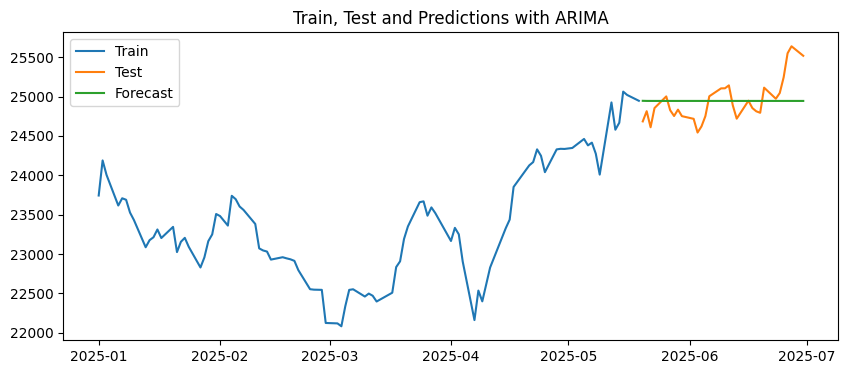

The MAE is 211.17
The RMSE is 268.65
The MAPE is 0.84 %


In [ ]:
## Visualize the Forecasted model
model_assessment(train['y']['2025'], test['y'], predictions, "ARIMA")

#### SARIMAX

In [ ]:
model_sarima = SARIMAX(
    train['y'],
    order= (4,1,2),
    seasonal_order=(3,0,1,7)).fit()
print(model_sarima.summary())

s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 4677
Model:             SARIMAX(4, 1, 2)x(3, 0, [1], 7)   Log Likelihood              -28808.079
Date:                             Sun, 31 Aug 2025   AIC                          57638.157
Time:                                     22:58:48   BIC                          57709.110
Sample:                                          0   HQIC                         57663.110
                                            - 4677                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2797      0.248      1.129      0.259      -0.206       0.765
ar.L2         -0.5548      

In [69]:
predictions_sarima = model_sarima.forecast(steps=test_days)

s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
s:\Data Science\Coursework\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [70]:
predictions_sarima.index = test.index

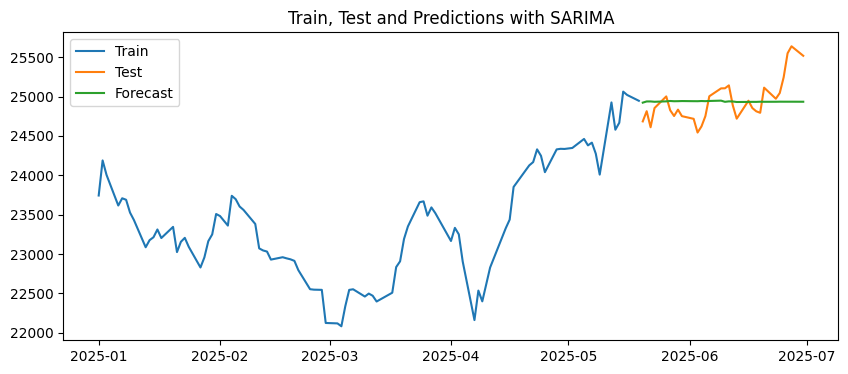

The MAE is 210.55
The RMSE is 269.46
The MAPE is 0.84 %


In [71]:
model_assessment(train['y']['2025'], test['y'], predictions_sarima, 'SARIMA')